# Homework 7: Center, Spread, and Confidence Intervals

## Due Friday, May 21st at 11:59pm

Welcome to Homework 7! This week, we will go over center, spread, and confidence intervals. You can find additional help on these topics in Lecture 19 (Bootstrapping), Lecture 20 (Confidence Intervals), and Lecture 21 (Center & Spread) of the course material. Please refer to [the course webpage](https://urldefense.com/v3/__http://dsc10.com__;!!Mih3wA!Ua1AK2ScUCKWjEfbovIVSRipI50TlZ8FUBCZT6Wsi6JpztgR9o9MJfDxCkqS67Tz$ ). 

### Instructions

This assignment is due Friday, May 21st at 11:59pm. You are given six slip days thoughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

Remember that you may work in pairs for this assignment! If you work in a pair, you must work with someone from your team, and you should submit one notebook to Gradescope for the both of you.

You should start early so that you have time to get help if you're stuck. See the course calendar on Canvas for the schedule and Zoom links.

In [1]:
# please don't change this cell, but do make sure to run it
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

## 1. Polling


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.55 |
|Candidate T | 0.32 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.02 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [2]:
#: run this cell to display the results of the survey -- don't change this cell!
votes = bpd.DataFrame().assign(vote=np.array(['C']*550 + ['T']*320 + ['J']*80 + ['S']*30 + ['U']*20))
votes = votes.sample(votes.shape[0],replace=False)
num_votes = votes.shape[0]
votes

,vote
249,C
89,C
152,C
116,C
531,C
...,...
391,C
370,C
58,C
39,C


Below, we have given you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

<AxesSubplot:ylabel='Frequency'>

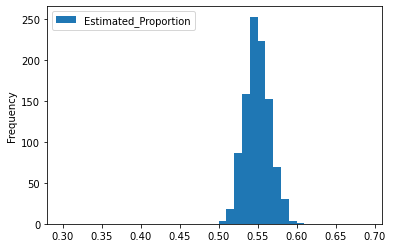

In [3]:
#: run the bootstrap
def proportions_in_resamples():
    statistics = np.array([])
    for i in np.arange(1000):
        bootstrap = votes.sample(num_votes, replace = True)
        sample_statistic = np.count_nonzero(bootstrap.get('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

boot_proportions = proportions_in_resamples()
bpd.DataFrame().assign(Estimated_Proportion=boot_proportions).plot(kind='hist',bins=np.arange(0.3,0.7,0.01))

**Question 1.1.** Using the array `boot_proportions`, compute an approximate 95% confidence interval for the true proportion of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `votes_lower_bound` and `votes_upper_bound`, respectively.)

In [4]:
votes_lower_bound = np.percentile(boot_proportions, 2.5)
votes_upper_bound = np.percentile(boot_proportions, 97.5)

#: print the confidence interval
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(votes_lower_bound, votes_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.521000, 0.582025]


In [5]:
grader.check("q1_1")

q1_1 passed!

**Question 1.2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use confidence intervals to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{(Candidate C's proportion of the vote)} - \text{(Candidate T's proportion of the vote)}.$$

Use the bootstrap with 1000 resamples to compute an approximate distribution for Candidate C's lead over Candidate T, and store your bootstrap estimates in an array called `boot_leads`. Plot a histogram of the resulting samples.

*Hint*: Use the code for `proportions_in_resamples` given to you above as a starting point.

<AxesSubplot:ylabel='Frequency'>

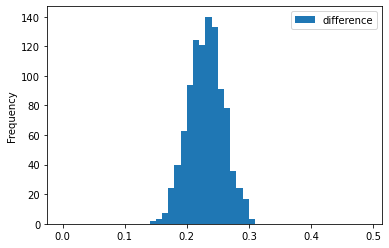

In [6]:
def leads_in_resamples():
    statistics = np.array([])
    for i in np.arange(1000):
        bootstrap = votes.sample(num_votes, replace = True)
        c_statistic = np.count_nonzero(bootstrap.get('vote') == 'C')/num_votes
        t_statistic = np.count_nonzero(bootstrap.get('vote') == 'T')/num_votes
        statistics = np.append(statistics, c_statistic - t_statistic)
    return statistics

boot_leads = leads_in_resamples()
bpd.DataFrame().assign(difference=boot_leads).plot(kind='hist',bins=np.arange(.0,.5,.01))

In [7]:
grader.check("q1_2")

q1_2 passed!

**Question 1.3.** Compute an approximate 95% confidence interval for the difference in proportions.

In [8]:
diff_lower_bound = np.percentile(boot_leads, 2.5)
diff_upper_bound = np.percentile(boot_leads, 97.5)

#: print the confidence interval
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.175975, 0.286000]


In [9]:
grader.check("q1_3")

q1_3 passed!

The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.52, .58]$$

(Your answer might have been slightly different, but that doesn't mean it was wrong since the data was randomly sampled.)

**Question 1.4.**
Can we say that 95% of the population lies in the range $[.52, .58]$? Assign your choice to variable `q1_4`. 

1. Yes
2. No

In [10]:
q1_4 = 2
q1_4

2

In [11]:
grader.check("q1_4")

q1_4 passed!

**Question 1.5.**
Can we say that the true proportion of the population that will vote for Candidate C is a random quantity with approximately a 95% chance of falling between 0.52 and 0.58? Assign your choice to variable `q1_5`.

1. No
2. Yes

In [12]:
q1_5 = 2
q1_5

2

In [13]:
grader.check("q1_5")

q1_5 passed!

**Question 1.6.**
Suppose we produced 20,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 20,000 intervals do you expect will actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be the *number* of intervals, not the proportion or percentage.

In [14]:
how_many = 20000 * .95
how_many

19000.0

In [15]:
grader.check("q1_6")

q1_6 passed!

**Question 1.7.**

The staff also created 80%, 90%, and 99% confidence intervals from one sample (shown below), but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents and assign your choices in variables `q1_7_80`, `q1_7_90`, and `q1_7_99`, each for likely 80%, 90%, and 99% confidence intervals respectively.

Tip: Draw out the confidence intervals on a piece a paper to help you visualize them better.

1. $[.516,.584]$

2. $[.538,.563]$

3. $[.53,.57]$

In [16]:
q1_7_80 = 2
q1_7_90 = 3
q1_7_99 = 1
q1_7_80, q1_7_90, q1_7_99

(2, 3, 1)

In [17]:
grader.check("q1_7")

q1_7 passed!

## 2. Hardest Writing Course
Suppose it's application season and you're a current high school senior looking to apply to the prestigious UCSD for data science. Also, suppose you dislike writing and want to strategically analyze all the UCSD college writing courses, to figure out colleges to avoid applying to and colleges where you have the best shot at getting a decent grade. Luckily, UCSD has data on its CAPES website about writing courses (except for Muir's writing course due to unknown reasons). Each row corresponds to a particular quarter and course, and the data includes the name of the course, the average study hours per week for the quarter, and the average grade for the quarter (on a GPA scale). Now it's time to analyze and figure out whether the writing course rumors are true (or people just like complaining). 

In [18]:
# Run this cell to read data; don't change it
writing = bpd.read_csv("data/writing_courses_ucsd.csv", index_col = 0)
writing.iloc[:5]

,course,Study Hrs/wk,grades
0,HUM,6.32,3.03
1,HUM,7.46,3.14
2,HUM,5.90,3.02
3,HUM,6.04,3.01
4,HUM,6.37,3.10


In [19]:
writing

,course,Study Hrs/wk,grades
0,HUM,6.32,3.03
1,HUM,7.46,3.14
2,HUM,5.90,3.02
3,HUM,6.04,3.01
4,HUM,6.37,3.10
...,...,...,...
470,CAT,6.58,2.25
471,CAT,4.67,2.82
472,CAT,5.65,2.91
473,CAT,5.97,2.77


**Question 2.1a.** The first thing to do before jumping into analysis is to figure out the mean study hours and mean grade for each course. Create a table called `course_means` that has index as `course` and columns consist of `Study Hrs/wk` and `grades`. `Study Hrs/wk` and `grades` contain the means of `Study Hrs/wk` and `grades` respectively. 

In [20]:
course_means = writing.groupby('course').mean()
course_means

,Study Hrs/wk,grades
course,,
CAT,4.963670,3.142661
DOC,5.288857,3.195942
HUM,6.707935,2.888043
MMW,7.164597,3.085877
WCWP,8.011500,3.033425


In [21]:
grader.check("q2_1a")

q2_1a passed!

**Question 2.1b.** You may have noticed that the mean grades for some courses is `nan`. This means that some grades are missing for these courses (missing values are represented by `nan`). Drop all the rows in the `writing` table that contain missing values and assign the new table to the variable `writing_fixed`. After this, create a table called `course_means_fixed` with no `nan` values in the `grades` column.

Hint: [np.isnan()](https://urldefense.com/v3/__https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html__;!!Mih3wA!Ua1AK2ScUCKWjEfbovIVSRipI50TlZ8FUBCZT6Wsi6JpztgR9o9MJfDxCoJ4NlkL$ ) or [np.isfinite()](https://urldefense.com/v3/__https://docs.scipy.org/doc/numpy/reference/generated/numpy.isfinite.html__;!!Mih3wA!Ua1AK2ScUCKWjEfbovIVSRipI50TlZ8FUBCZT6Wsi6JpztgR9o9MJfDxCoBc33hC$ ) might be useful.

In [22]:
writing_fixed = writing[~np.isnan(writing.get("grades"))]
course_means_fixed = writing_fixed.groupby("course").mean()
writing_fixed , course_means_fixed

(    course  Study Hrs/wk  grades
 0      HUM          6.32    3.03
 1      HUM          7.46    3.14
 2      HUM          5.90    3.02
 3      HUM          6.04    3.01
 4      HUM          6.37    3.10
 ..     ...           ...     ...
 470    CAT          6.58    2.25
 471    CAT          4.67    2.82
 472    CAT          5.65    2.91
 473    CAT          5.97    2.77
 474    CAT          3.75    2.79
 
 [457 rows x 3 columns],
         Study Hrs/wk    grades
 course                        
 CAT         4.963670  3.142661
 DOC         5.232029  3.195942
 HUM         6.707935  2.888043
 MMW         7.141404  3.085877
 WCWP        7.732055  3.033425)

In [23]:
grader.check("q2_1b")

q2_1b passed!

**Question 2.2.** Revelle's writing course HUM seems to have pretty low average grade. Produce 1,000 bootstrapped estimates for the average grade of HUM. Store the estimates in the `hum_averages` array. Use this `hum_averages` array to plot a histogram of the estimated averages. The label on the x-axis should be "Estimated Average Grades for HUM".

Use the `hum_averages` array to calculate an approximate 95% confidence interval for the true average grade. Assign the the corresponding bounds to `lower_bound` and `upper_bound`. Do NOT round the bounds.

(2.8509632884479097, 2.9291548624140087)

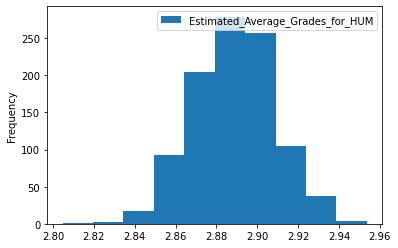

In [24]:
hum_averages = np.array([])

for i in np.arange(1000):
    sample = writing.sample(writing.shape[0], replace=True)
    sample_fixed = sample[~np.isnan(sample.get("grades"))]
    hum_mean = sample_fixed.groupby('course').mean().get('grades').loc['HUM']
    hum_averages = np.append(hum_averages, hum_mean)

bpd.DataFrame().assign(Estimated_Average_Grades_for_HUM=hum_averages).plot(kind='hist')    
lower_bound = np.percentile(hum_averages, 2.5)
upper_bound = np.percentile(hum_averages, 97.5)
lower_bound, upper_bound

In [25]:
grader.check("q2_2")

q2_2 passed!

**Question 2.3.** You want to create a similar histogram for each of the other courses, and also calculate the corresponding confidence intervals. Repeating the process above 4 times would be time-consuming. Create a function called `ci_and_hist`, which takes in a course name as its input, plots the histogram for 1,000 bootstrapped estimates for the average grade and returns a `str` describing the approximate 95% confidence interval for the course (see the example below).

For example, `ci_and_hist('HUM')` should plot the same histogram in Question 2 and return 'The 95% confidence interval for HUM is [2.85, 2.93]', where the 2.85 and 2.93 were calculated by rounding `lower_bound` and `upper_bound` to two decimal places. 

**Note:** For the returned string, make sure you follow the format above and remember to change the course name and the confidence interval for different courses. For the histogram, the label on the x-axis should also change accordingly to the courses.

'The 95% confidence interval for HUM is [2.850000, 2.930000]'

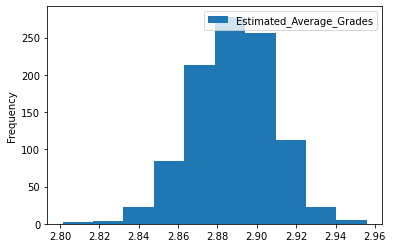

In [26]:
def ci_and_hist(course_name):
    averages = np.array([])
    for i in np.arange(1000):
        sample = writing_fixed.sample(writing_fixed.shape[0], replace = True)
        average = sample.groupby("course").mean().get("grades").loc[course_name]
        averages = np.append(averages, average)
    bpd.DataFrame().assign(Estimated_Average_Grades=averages).plot(kind='hist')
    lower_bound = round(np.percentile(averages, 2.5), 2)
    upper_bound = round(np.percentile(averages, 97.5), 2)
    return "The 95% confidence interval for {:s} is [{:f}, {:f}]".format(course_name, lower_bound, upper_bound)

ci_and_hist('HUM')

In [27]:
grader.check("q2_3")

q2_3 passed!

'The 95% confidence interval for WCWP is [3.010000, 3.050000]'

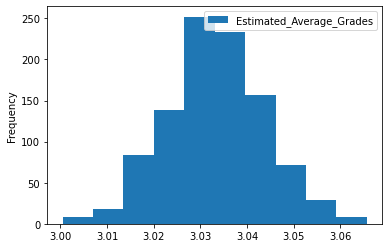

In [28]:
#: try it out
ci_and_hist('WCWP')

**Question 2.4.** Your friend claims that Marshall's writing course DOC is actually not as hard as everyone says. She says that because our CAPE data is only a sample of the full population of course offerings, the actual average grade for DOC could be 3.3. Run the cell below to use the `ci_and_hist` function you defined above to calculate an approximate 95% confidence interval for the average grade in DOC. Can you reject her hypothesis using this confidence interval? Assign your answer to variable `q2_4`.

1. Yes, the confidence interval includes 3.3
2. No, the confidence interval includes 3.3
3. Yes, the confidence interval doesn't include 3.3
4. No, the confidence interval doesn't include 3.3

'The 95% confidence interval for DOC is [3.170000, 3.230000]'

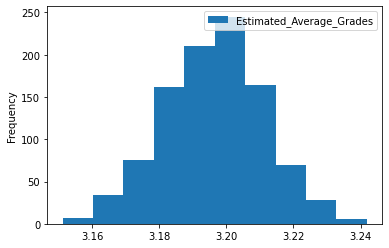

In [29]:
ci_and_hist("DOC") 

In [30]:
q2_4 = 3
q2_4

3

In [31]:
grader.check("q2_4")

q2_4 passed!

**Question 2.5a.** Now that you've looked at the average grades for different courses, you're curious about the average amount of time each writing course requires. This time, you'll test whether each individual course has the same average study hours per week as that of all the writing courses combined. 

First, produce 1,000 bootstrapped estimates for the average study hours per week of all the writing courses combined. Use these estimates to produce an approximate 99% confidence interval for the true average study hours. Round the bounds of the confidence interval to 2 decimal places and save them into `study_lower_bound` and `study_upper_bound`.

In [32]:
hours_averages = np.array([])

for i in np.arange(1000):
    bootstrap = writing_fixed.sample(writing_fixed.shape[0], replace = True)
    sample_statistic = bootstrap.get("Study Hrs/wk").mean()
    hours_averages = np.append(hours_averages, sample_statistic)

study_lower_bound = round(np.percentile(hours_averages, 0.5), 2)
study_upper_bound = round(np.percentile(hours_averages, 99.5), 2)
study_lower_bound, study_upper_bound

(6.18, 6.51)

In [33]:
grader.check("q2_5a")

q2_5a passed!

**Question 2.5b.** Compare the average study hours for each individual writing course to the average study hours of all writing courses combined. Your final answer should be a 5 element array named `study_hypotheses`.

In the order of `[CAT, DOC, HUM, MMW, WCWP]`, the corresponding element in the array `study_hypotheses` should be -1 if the course's average study hours is significantly lower than that of all the writing courses combined, 0 if you cannot reject the hypothesis that the course has the same average study hours as that of all the courses combined, and 1 if the course's average study hours is significantly higher than that of all the courses combined. You may want to use the `course_means_fixed` table you created in Question 1b.

**Note:** It's okay to hard code your answer for this question.

In [34]:
def headache(course_name):
    hours_averages = np.array([])

    for i in np.arange(1000):
        bootstrap = writing_fixed.sample(writing_fixed.shape[0], replace = True)
        sample_statistic = bootstrap.groupby("course").mean().get("Study Hrs/wk").loc[course_name]
        hours_averages = np.append(hours_averages, sample_statistic) 
    
    lower_bound = round(np.percentile(hours_averages, .5), 2)
    upper_bound = round(np.percentile(hours_averages, 99.5), 2)
    
    return lower_bound,upper_bound

#print(headache('CAT'))
#print(headache('DOC'))
#print(headache('HUM'))
#print(headache('MMW'))
#print(headache('WCWP'))

study_hypotheses = np.array([-1,-1,1,1,1])
study_hypotheses

array([-1, -1,  1,  1,  1])

In [35]:
grader.check("q2_5b")

q2_5b passed!

## 3. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by $$\frac{\text{sd of the original distribution}}{\sqrt{\text{sample size}}}$$ In other words, suppose we start with *any distribution* that has standard deviation $\sigma$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

**Question 3.1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [36]:
def simulate_sample_n(n):
    simulate = np.array([])
    for i in np.arange(n):
        simulate = np.append(simulate, np.count_nonzero(np.random.choice([0, 1], size=5000, replace=True))/5000)
    return simulate
    
simulate_sample_n(5)

array([0.4898, 0.5012, 0.5042, 0.5006, 0.5142])

In [37]:
grader.check("q3_1")

q3_1 passed!

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. The x- and y-scales are kept the same to facilitate comparisons.

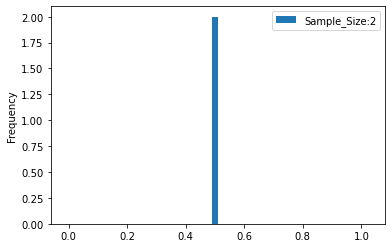

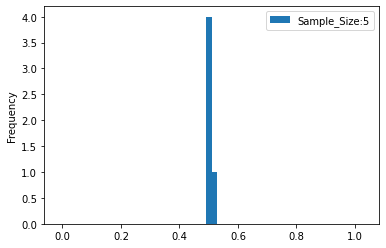

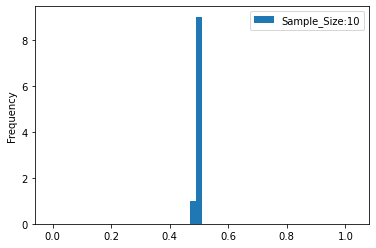

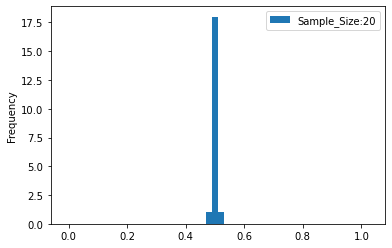

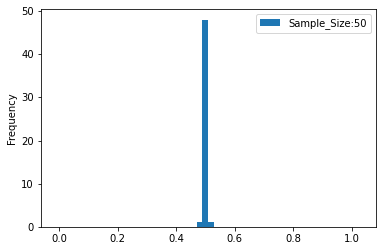

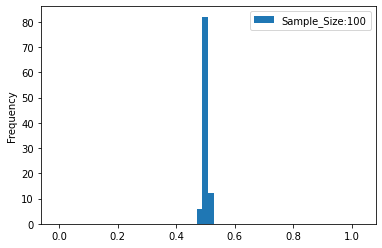

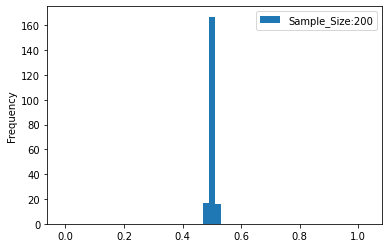

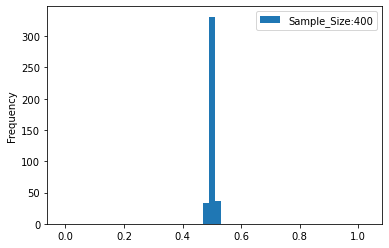

In [38]:
#: run this cell to visualize
bins = np.arange(-0.01,1.05,0.02)

for sample_size in np.array([2, 5, 10, 20, 50, 100, 200, 400]):
    bpd.DataFrame().assign(**{'Sample_Size:{}'.format(sample_size) : simulate_sample_n(sample_size)}).plot(kind = 'hist', bins=bins)

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported flight delay data and computed the standard deviation  of delay time (in minutes):

In [39]:
#: run this cell, but don't change it under penalty of law!
united = bpd.read_csv('data/united_summer2015.csv')
united_std = np.std(united.get('Delay'))
united_std

39.480199851609314

**Question 3.2.** Write a function called `predict_sd`.  It takes a sample size `n` (a number) as its argument.  It returns the predicted standard deviation of the sample mean for samples of size `n` from the flight delays, according to the CLT.

In [40]:
def predict_sd(n):
    return united_std / np.sqrt(n)

predict_sd(10)

12.484735400972708

In [41]:
grader.check("q3_2")

q3_2 passed!

**Question 3.3.** Write a function called `empirical_sd` that takes a sample size `n` as its argument. The function should simulate 1000 samples of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 1000 samples**.

*Hint:* This function will be similar to the `simulate_sample_n` function you wrote earlier.

In [42]:
def empirical_sd(n): 
    united_sd = np.array([])
    for i in np.arange(1000):
        bootstrap = united.sample(n).get("Delay")
        sample_mean = bootstrap.mean()
        united_sd = np.append(united_sd, sample_mean)
    return np.std(united_sd)

empirical_sd(10)

13.316137352475755

In [43]:
grader.check("q3_3")

q3_3 passed!

The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes. It may take a few moments to run.

<AxesSubplot:xlabel='Sample_Size', ylabel='Predicted_SD'>

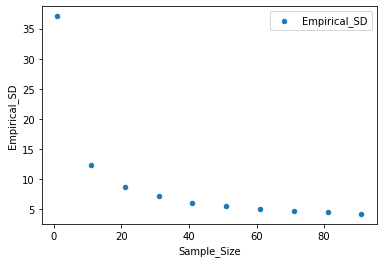

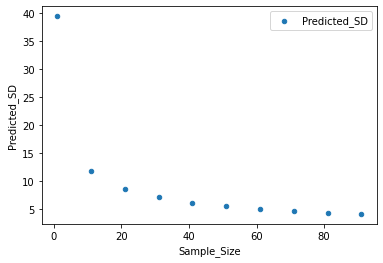

In [44]:
#: run this cell to visualize
sd_table = bpd.DataFrame().assign(Sample_Size = np.arange(1, 101, 10))
predicted = sd_table.get('Sample_Size').apply(predict_sd)
empirical = sd_table.get('Sample_Size').apply(empirical_sd)
sd_table = sd_table.assign(Predicted_SD = predicted, Empirical_SD = empirical)
sd_table.plot(kind='scatter',x='Sample_Size', y='Empirical_SD',label = 'Empirical_SD')
sd_table.plot(kind='scatter',x='Sample_Size', y='Predicted_SD',label = 'Predicted_SD')

## 4. UCSD P/NP Decision and the Normal Distribution


Because of the pandemic, UCSD had a decision to make last quarter on whether or not students should be allowed to take their courses for a Pass/No Pass instead of a grade. Before coming to a conclusion, a Data Scientist at UCSD decided to see if students actually wanted a P/NP option, or if it was just a vocal minority asking for these accomodations.

He polled a uniform random sample of all UCSD students, and he found that 500 of the 800 sampled students are in favor of a P/NP grading option.

In [45]:
#: run this cell, but don't change it!
sample = bpd.DataFrame().assign(
    Vote =np.array(["Yes", "No"]),
    Count= np.array([500,   300]))
sample_size = sample.get("Count").sum()
sample_proportions = sample.assign(
    Proportion=sample.get("Count") / sample_size)
sample_proportions

,Vote,Count,Proportion
0,Yes,500,0.625
1,No,300,0.375


He used 1,000 bootstrap resamples to compute a confidence interval for the proportion of all UCSD students who are in favor of P/NP.  Run the next cell to see the empirical distribution of Yes proportions in the 1,000 resamples.

<AxesSubplot:ylabel='Frequency'>

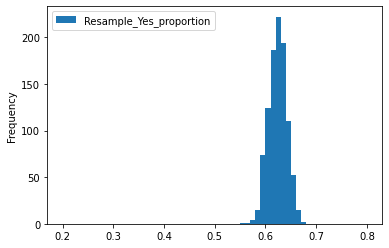

In [46]:
#: run this cell, but don't change it!
resample_yes_proportions = np.array([])
for i in np.arange(1000):
    resample = np.random.multinomial(sample_size,sample_proportions.get("Proportion"))/sample_size
    resample_yes_proportions = np.append(resample_yes_proportions, resample[0])
bpd.DataFrame().assign(Resample_Yes_proportion = resample_yes_proportions).plot(kind = 'hist',bins=np.arange(.2, .8, .01))

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\text{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is a fun exercise for those who enjoy algebra -- and who doesn't?)

**Question 4.1.**
**Without accessing the data in `resample_yes_proportions` in any way**, and instead using only the Central Limit Theorem and the numbers of "For" and "Against" students in our sample of 800, compute a number `approximate_sd` that's the predicted standard deviation of the array `resample_yes_proportions` according to the Central Limit Theorem. Since you don't know the true proportions of 0s and 1s in the population, use the proportions in the sample instead (since they're probably similar).

In [47]:
approximate_sd = np.sqrt(0.375 * .625) / np.sqrt(800)
                          
approximate_sd

0.01711632992203644

In [48]:
grader.check("q4_1")

q4_1 passed!

**Question 4.2.**
Compute the standard deviation of the array `resample_yes_proportions` to verify that your answer to question 2 is approximately right.

In [49]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.017465018206045478

In [50]:
grader.check("q4_2")

q4_2 passed!

**Question 4.3.**
**Still without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.  The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint*: Before, we've used `percentile` on the bootstrap distribution to find the bounds for the confidence interval. Now, we're not allowed to use the bootstrap distribution -- but we don't need it! We know (from the Central Limit Theorem) that the distribution of the sample mean is Normal with a certain standard deviation. We also know that 95% of the area of the normal distribution falls within a certain number of standard deviations from the mean.

In [51]:
sample_proportions

,Vote,Count,Proportion
0,Yes,500,0.625
1,No,300,0.375


In [52]:
lower_limit = .625 - (2 * approximate_sd)
upper_limit = .625 + (2 * approximate_sd)

lower_limit, upper_limit

(0.5907673401559271, 0.6592326598440729)

In [53]:
grader.check("q4_3")

q4_3 passed!

In [54]:
#: print the confidence interval
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.5907673401559271 upper: 0.6592326598440729


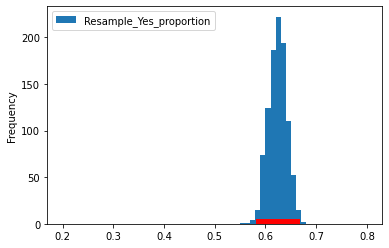

In [55]:
#: run this cell to plot your confidence interval
bpd.DataFrame().assign(Resample_Yes_proportion = resample_yes_proportions).plot(bins=np.arange(.2, .8, .01),kind = 'hist').plot(np.array([lower_limit, upper_limit]), np.array([0,0]), c='r', lw=10);

Your confidence interval should be near the number 0.55.  That means we can't be very sure if students want P/NP, even though the sample "For" proportion is a bit above 0.5.

UCSD really needs to know if students need this option or not. To have more confidence in the result of the poll, the decide to redo it with a larger sample. They'd be happy if the standard deviation of the sample mean were only 0.005.  They ask their Data Scientist to run a new poll with a sample size that's large enough to achieve that. (Polling is time-consuming, so the sample also shouldn't be bigger than necessary.)

Instead of making the conservative assumption that the population standard deviation is 0.5 (coding "For" voters as 1 and "Against" voters as 0), he decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{"For" proportion in the sample}) \times (\text{"Against" proportion in the sample})}.$$

Under that assumption, he computes the smallest sample size necessary in order to be confident that the standard deviation of the sample mean is only 0.005.

**Question 4.4.**
What sample size did he find? Assign your answer to the variable `sample_size`. Remember the sample size needs to be an integer.

Remember that: $$\text{sample means SD} = \frac{\text{population SD}}{\sqrt{\text{sample size}}},$$

In [56]:
sigma = np.sqrt(.625 * .375) / 0.005
sample_size = sigma **2
sample_size = int(sample_size)
sample_size

9375

In [57]:
grader.check("q4_4")

q4_4 passed!

# 5. Conceptual Questions

**Question 5.1.** Referring back to the previous question about P/NP, suppose UCSD wanted to be even more precise and would be happier if the sample standard deviation of the sample mean was 0.001. Can the Data Scientist carry this out?
1. No, there is no need to be more precise and 0.005 is acceptable as it is.
2. Yes, he needs to sample more people so that the sample means SD becomes smaller  
3. Yes, he can repeat the sample again until he comes across a sample with a standard deviation of 0.001
4. No, the sample size required to reach that sample standard deviation is too large

In [58]:
q5_1 = 4

In [59]:
grader.check("q5_1")

q5_1 passed!

**Question 5.2.** What is the correct way of standardizing a value of 70 if the mean is 85 and the standard deviation is 9?

1.
$$\frac{({70-85})^2}{9}$$

2.
$$\frac{70-85}{9}$$

3.
$$\frac{70-85}{9}$$

4.
$$\frac{{70-85}}{\sqrt{9}}$$



In [60]:
q5_2 = 3

In [61]:
grader.check("q5_2")

q5_2 passed!

**Question 5.3.** According to Chebychev's Bounds, within how many SDs does at least 65% of the data fall in?

1. 1.34
2. 1.69
3. 2.04
4. 2.50

In [62]:
q5_3 = 2

In [63]:
grader.check("q5_3")

q5_3 passed!

**Question 5.4.** True or False: We can sample from any distribution and apply Central Limit Theorem.

1. True
2. False

In [64]:
q5_4 = 1

In [65]:
grader.check("q5_4")

q5_4 passed!

# Finish Line

Congratulations! You are done with homework 7.

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [66]:
grader.check_all()

q1_1 passed!

q1_2 passed!

q1_3 passed!

q1_4 passed!

q1_5 passed!

q1_6 passed!

q1_7 passed!

q2_1a passed!

q2_1b passed!

q2_2 passed!

q2_3 passed!

q2_4 passed!

q2_5a passed!

q2_5b passed!

q3_1 passed!

q3_2 passed!

q3_3 passed!

q4_1 passed!

q4_2 passed!

q4_3 passed!

q4_4 passed!

q5_1 passed!

q5_2 passed!

q5_3 passed!

q5_4 passed!